<a href="https://colab.research.google.com/github/alexhallam/tablespoon/blob/main/tablespoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Predict Apple Stock Price

For this example import that `APPL` data set. This data set holds the log values of APPL stock opening price. The forecast will be a simple `Naive` forecast. The `Naive` forecast takes the last value as the forecast and
the uncertainty increases outward in a conic shape.

In [ ]:
#!pip3 install tablespoon

In [4]:
import pandas as pd
import tablespoon as tbsp
from tablespoon.data import APPL
from mizani.breaks import date_breaks
from plotnine import *
from datetime import datetime


# make date string a date object
df_APPLE = APPL
df_APPLE = df_APPLE.assign(ds = lambda df: pd.to_datetime(df.ds))
df_APPLE

,ds,y
0,2021-08-01,4.986069
1,2021-08-02,4.986069
2,2021-08-03,4.982304
3,2021-08-04,4.992268
4,2021-08-05,4.990296
...,...,...
149,2021-12-28,5.193845
150,2021-12-29,5.189228
151,2021-12-30,5.190008
152,2021-12-31,5.182289


The output of the models is always the same. see the following columns

`ds`: Date stamp

`rep`: The id associated with the sample draw. This has the same length as the 
`uncertainty_samples` parameter

`y_sim`: The simulated predictions

I personally like to add a `model` column so I can append my models together in the future.


In [5]:
n = tbsp.Naive()
df_n = (n.predict(df_APPLE, horizon=7*4, frequency="D", lag = 1, uncertainty_samples = 500).assign(model = 'naive'))
df_n.head()

,ds,rep,y_sim,model
0,2022-01-02,0,5.171820,naive
1,2022-01-02,1,5.159334,naive
2,2022-01-02,2,5.175439,naive
3,2022-01-02,3,5.193447,naive
4,2022-01-02,4,5.199460,naive


/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 14000 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 154 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


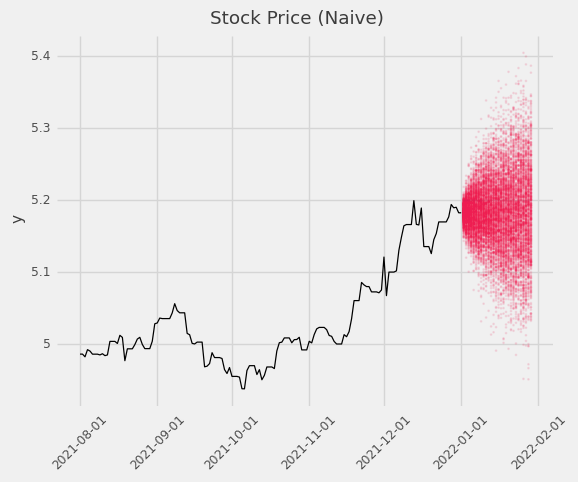

<ggplot: (8746384164649)>

In [6]:
theme_set(theme_538)
palette = ["#000000", "#ee1d52"]
df_actuals_forecasts_n = pd.concat([df_APPLE, df_n])
p = (
    ggplot(df_actuals_forecasts_n, aes(x="ds", y="y"))
    + geom_line(aes(y = 'y'), color = palette[0])
    + geom_point(aes(y = 'y_sim'), color = palette[1], size = 0.1, alpha = 0.1)
    + scale_x_datetime(breaks=date_breaks("1 month"))
    + theme(axis_text_x=element_text(angle=45))
    + xlab("")
    + ggtitle("Stock Price (Naive)")
    + scale_color_manual(palette)
)
p

# 2. Seasonal Naive Forecasting

In [7]:
import tablespoon as tbsp
from tablespoon.data import SEAS

sn = tbsp.Snaive()
df_sn = sn.predict(
    SEAS, horizon=7 * 4, frequency="D", lag=7, uncertainty_samples=800
).assign(model="snaive")

df_sn.head(10)

,ds,rep,y_sim,model
0,2021-08-22,0,213.067201,snaive
1,2021-08-22,1,142.120903,snaive
2,2021-08-22,2,73.199437,snaive
3,2021-08-22,3,140.761484,snaive
4,2021-08-22,4,160.666685,snaive
5,2021-08-22,5,181.140212,snaive
6,2021-08-22,6,98.119120,snaive
7,2021-08-22,7,49.605709,snaive
8,2021-08-22,8,102.023038,snaive
9,2021-08-22,9,168.879255,snaive


/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 22400 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 21 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/dist-packages/plotnine/guides/guides.py:200: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  PlotnineWarning)


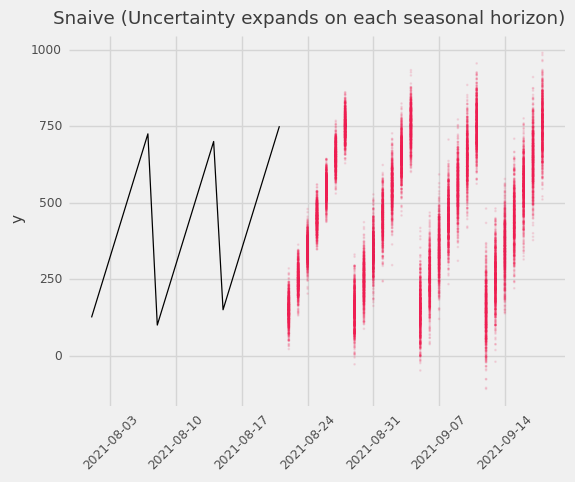

<ggplot: (8746384192389)>

In [8]:
theme_set(theme_538)
palette = ["#000000", "#ee1d52"]
df_SEAS = SEAS
df_SEAS = df_SEAS.assign(ds = lambda df: pd.to_datetime(df.ds))
df_actuals_forecasts_n = pd.concat([df_SEAS, df_sn])
p = (
    ggplot(df_actuals_forecasts_n, aes(x="ds", y="y"))
    + geom_line(aes(y = 'y'), color = palette[0])
    + geom_point(aes(y = 'y_sim'), color = palette[1], size = 0.1, alpha = 0.1)
    + scale_x_datetime(breaks=date_breaks("1 week"))
    + theme(axis_text_x=element_text(angle=45))
    + xlab("")
    + ggtitle("Snaive (Uncertainty expands on each seasonal horizon)")
    + scale_color_manual(palette)
)
p